# K-Nearest neighbors and K-Means Algorithms 
We are implementing some basic algorithms, useful in image processing, from scratch to get a better understanding of them and how they work behind the scenes of already made libraries, such as scikit-learn.
First we import the data set (Iris) to get a feel of it. Then we implemet K-Nearest neighbors algorithm and test it on this data set. Finally, we implement K-Means algorithm and do the same. 
Some theory and important points about each algorithm are discussed as well.

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA 

## Looking at the Dataset
#### Load Dataset and Get a feel of it 

In [2]:
# Load dataset
iris = load_iris()
type(iris)

sklearn.utils.Bunch

In [3]:
# Get Keys
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
# Get feature names (variable names)
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Plot Two Features  

(150, 4)


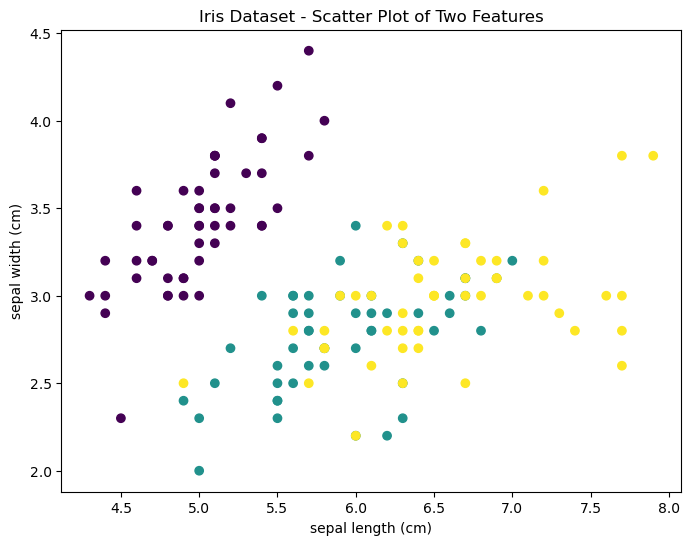

In [5]:
# Get Data
X = iris.data  #data points
y = iris.target #labels
print (X.shape)

# Select two features (e.g., sepal length and sepal width)
feature1_index = 0  # Sepal length
feature2_index = 1  # Sepal width

# Extract the selected features
feature1 = X[:, feature1_index]
feature2 = X[:, feature2_index]

# print(data)
# print(data.shape)
# print(type(data))

# print(target)
# print(target.shape)
# print(type(target))

# Create a scatter plot
plt.figure(figsize=(8, 6))
# plt.scatter(feature1, feature2, c=y, cmap='viridis', s=50)
plt.scatter(feature1, feature2, c=y)
plt.xlabel(iris.feature_names[feature1_index])
plt.ylabel(iris.feature_names[feature2_index])
plt.title('Iris Dataset - Scatter Plot of Two Features')
plt.show()

## K-Nearest Neighbor (KNN)

### What is KNN (K-Nearest Neighbor) Algorithm?
The K-Nearest Neighbor (KNN) algorithm is a popular machine learning technique used for classification and regression tasks. It relies on the idea that similar data points tend to have similar labels or values.

During the training phase, the KNN algorithm stores the entire training dataset as a reference. When making predictions, it calculates the distance between the input data point and all the training examples, using a chosen distance metric such as Euclidean distance.

Next, the algorithm identifies the K nearest neighbors to the input data point based on their distances. In the case of `classification`, the algorithm assigns the most common class label among the K neighbors as the predicted label for the input data point <u>(Get the label with majority vote)</u>. For `regression`, it calculates the average or weighted average of the target values of the K neighbors to predict the value for the input data point <u>(get the average of input values)</u>.

### When Do We Use the KNN Algorithm?
KNN can be used for <u> both classification and regression</u> predictive problems. However, it is more widely used in classification problems in the industry. KNN is commonly used for its ease of interpretation and low calculation time.

### How Does the KNN Algorithm Work?
Let’s take a simple case to understand this algorithm.  Take the above plot of `Iris Dataset - Scatter Plot of Two Features`. You intend to find out the class of a random point(RP). RP can either be purple or green or yellow and nothing else. The “K” in KNN algorithm is the nearest neighbor we wish to take the vote from. Let’s say K = 3. Hence, we will now make a circle with RP as the center just as big as to enclose only three data points on the plane. 
Imagine the three closest points to RP are all yellow. Hence, with a good confidence level, we can say that the RP should belong to the class yellow. Here, the choice became obvious as all three votes from the closest neighbor went to yellow. The choice of the parameter K is very crucial in this algorithm. <u>(K is a hyperparameter, meaning that it is a configuration setting external to the model that can't be learned from the data.)</u> Next, we will understand the factors to be considered to conclude the best K.

### How does the K influence in the algorithm?
The following are the different boundaries separating the two classes with different values of K: 

<img src="https://www.analyticsvidhya.com/wp-content/uploads/2014/10/K-judgement.png" alt="Alternative text" width="500"/>
<img src="https://www.analyticsvidhya.com/wp-content/uploads/2014/10/K-judgement2.png" alt="Alternative text" width="500"/>

If you watch carefully, you can see that the boundary becomes smoother with increasing value of K. With K increasing to infinity it finally becomes all blue or all red depending on the total majority.  The training error rate and the validation error rate are two parameters we need to access different K-value. Following is the curve for the training error rate with a varying value of K :

<img src="https://www.analyticsvidhya.com/wp-content/uploads/2014/10/training-error.png" alt="Alternative text" width="500"/>

As you can see, the error rate at K=1 is always zero for the training sample. _This is because the closest point to any training data point is itself._ Hence the prediction is always accurate with K=1. If validation error curve would have been similar, our choice of K would have been 1. Following is the validation error curve with varying value of K:

<img src="https://www.analyticsvidhya.com/wp-content/uploads/2014/10/training-error_11.png" alt="Alternative text" width="500"/>

This makes the story more clear. <u>At K=1, we were overfitting the boundaries.</u> Hence, error rate initially decreases and reaches a minima. After the minima point, it then increase with increasing K. To get the optimal value of K, you can segregate the training and validation from the initial dataset. We can use _cross-validation_ to select the optimal value of k for the k-NN algorithm, which helps improve its performance and prevent overfitting or underfitting. Cross-validation is also used to identify the outliers before applying the KNN algorithm.

## Implementing the KNN Algorithm from Scratch

In [6]:
from collections import Counter

def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

class KNN:
    def __init__(self, k=3):
        self.k = k  #initialize an attribute named K for the instance (self.k) and give it a value of k. self refers to the instance of the class

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):

        #---- Original code ----
        # predictions = [self._predict(x) for x in X]
        # return predictions
        
        #---- Wrong code ----  // the predictions variable is overwritten in each iteration of the loop.
        # for x in X:
        #     predictions = [self._predict(x)]
        # return predictions
        
        #---- Corrected (does the same as the original) // collect all predictions, use a list to accumulate them.
        predictions = []
        for x in X:
            predictions.append(self._predict(x))
        return predictions

    def _predict(self, x):
        # compute the distance between all data points
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    
        # get the closest k (shortest distances)
        k_indices = np.argsort(distances)[:self.k]  # sort the indices of computed distances 
        k_nearest_labels = [self.y_train[i] for i in k_indices] # get the labels of all all data points (x) in those closest Ks 

        # majority vote
        most_common = Counter(k_nearest_labels).most_common() # get the most common label
        return most_common[0][0] # to get labels of 0, 1 and 2 

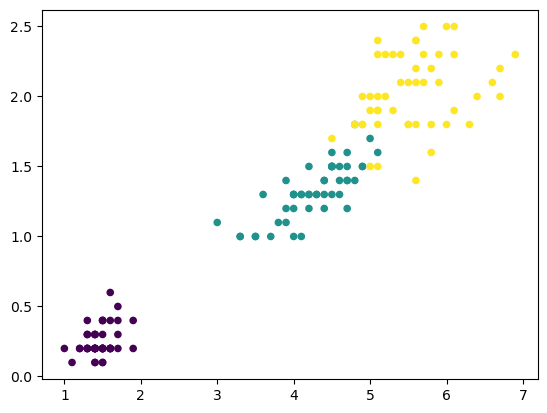

Accuracy: 94.67%


In [7]:
# Using the KNN Algorithm 

# Get Data points and labels 
# X, y = iris.data, iris.target

# Split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1234)

#Plot the data points 
plt.figure()
plt.scatter(X[:,2],X[:,3], c=y, cmap='viridis', s=20)
plt.show()

# Initialize KNN 
clf = KNN(k=3)  #clf (classifier) is an instance of a k-Nearest Neighbors (KNN) class we made above

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on test set
predictions = clf.predict(X_test)

# Print accuracy
acc = np.sum(predictions == y_test) / len(y_test)
print(f'Accuracy: {acc * 100:.2f}%')


### What happens if we change the train and test split? 
<b>Larger Training Set:</b>
When you use a larger portion of the data for training (e.g., 80% training, 20% testing), the model has more data to learn from. This can lead to better performance, especially if the dataset is representative and has enough diversity to capture the underlying patterns.

<b>Smaller Training Set:</b>
Conversely, using a smaller training set (e.g., 50% training, 50% testing) means the model has less data to learn from. This may result in a model that is less capable of generalizing to new, unseen data. It might be more prone to overfitting, especially if the dataset is small.

### What happens if K=1?
The accuracy drops because only the distance from the data point to itself is considered so the model overfits. Other problems with k=1 are:
 
1. _Overfitting:_
The model becomes more sensitive to noise in the training data as it relies heavily on the closest single data point. This may lead to overfitting, capturing fluctuations and outliers in the training data.

2. _Low Robustness:_
The model may struggle to generalize to new, unseen data because it essentially memorizes the training instances. If the nearest neighbor is an outlier or a noisy point, it can significantly impact predictions.

3. _Model Complexity:_
k=1 model is considered highly complex. It memorizes the training data, creating a decision boundary that closely follows the training instances. This complexity can be problematic when dealing with real-world datasets that contain noise.

4. _High Variance:_
The model is likely to have high variance, producing different predictions for slightly different input instances. This makes it less reliable and harder to interpret.

5. _Prone to Outliers:_
Outliers in the training data can strongly influence predictions since the closest neighbor might be an outlier. This makes the model susceptible to the presence of anomalies in the data.

Choosing k=1 is generally not recommended in practice unless the dataset is very small, and the noise is minimal. In most cases, a larger k is chosen (e.g., k=3,5, or a value determined through cross-validation) to improve the model's robustness and generalization to new data points. A larger k helps to smooth out the impact of individual noisy data points and makes the model less sensitive to local fluctuations in the data.

## K-Means 

In [8]:
class KMeans:

    def __init__(self, K=3, max_iters=100, plot_steps=False):
        # Initialize 
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

    # Helper Functions 
    def _initialize_centroids(self, X):
        indices = np.random.choice(len(X), self.K, replace=False) # replace=False so each number is chosen only once 
        return X[indices]   

    def _assign_clusters(self, X, centroids):
        distances = np.sqrt(np.sum((X - centroids[:, np.newaxis])**2, axis=2))
        # distances = euclidean_distance(X, centroids[:, np.newaxis])  -->  dimentiality error
        return np.argmin(distances, axis=0) 

    def _update_centroids(self, X, clusters):
        # The centers (mean vector) for each cluster
        centroids = np.array([X[clusters == k].mean(axis=0) for k in range(self.K)])
        return centroids


    # Main Function 
    def fit(self, X):
        # Initialize random centeroids
        self.centroids = self._initialize_centroids(X)

        # Optimize clusters 
        for i in range(self.max_iters):
            # Assign centroids to cluster
            clusters = self._assign_clusters(X, self.centroids)

            # Plot a step
            if self.plot_steps:
                self.plot(X, clusters, self.centroids)

            # Calculate new centroids 
            new_centroids = self._update_centroids(X, clusters)
            
            # Break if converged (no changes in centroids)
            if np.all(new_centroids == self.centroids):
                break
            
            # Update centroids 
            self.centroids = new_centroids

        # Final Plot
        self.plot(X, clusters, self.centroids)

    # Plot Function
    def plot(self, X, clusters, centroids):
        plt.figure(figsize=(8, 3))
        plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50)
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', label='Centroids')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('KMeans Clustering')
        plt.legend()
        plt.show()


(150, 4)
(150, 2)


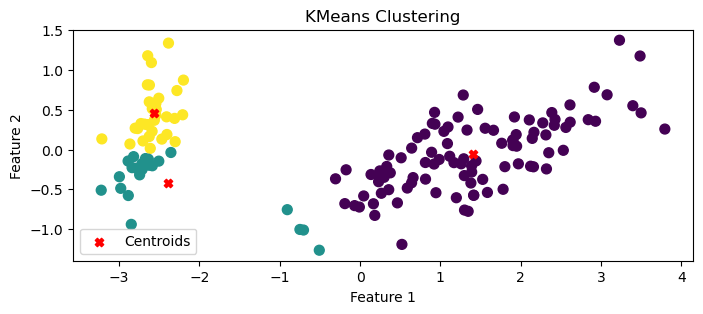

In [9]:
# Using KMeans Algorithm on Iris dataset

# Get Different features of Data set
X = X = iris.data[:, :4] 
print (X.shape)

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print (X_pca.shape)

# Instantiate and fit KMeans model
kmeans = KMeans(K=3, max_iters=150, plot_steps=False) # True to get a plot for each step
kmeans.fit(X_pca)

### Important Observations 

#### Vary the number of clusters and iterations. What do you observe?
<b>Number of Clusters:</b>
_High numbers_ of clusters can lead to overfitting whereas _lower numbers_ can leads to generalization of the model. However, if the number is too low, the model might overgeneralize and miss important features. 


<b>Number of Iterations:</b>
_increasing_ the number of iterations will help the accuracy but after a certain number of iterations the accuracy might not change much. a _low number_ will stop the algorithm too soon before it has the change to converge and as a result the accuracy will drop.


_These are hyperparameters whose value should be choosen carefully._

#### What is the impact of random initialization in k-means? How can you improve it?

The impact of random initialization in k-means is significant and can affect the final clustering results. The initial placement of cluster centroids influences the convergence of the algorithm and the quality of the final clusters. The reasons for the impact include:

<b>Sensitivity to Initial Centroid Locations:</b>

K-means aims to minimize the sum of squared distances between data points and their assigned cluster centroids. Different initial placements of centroids can lead to different local minima in the optimization process. As a result, the algorithm might converge to different final cluster assignments.

<b>Convergence to Local Optima:</b>

The k-means algorithm is susceptible to converging to local optima. Random initialization can lead to different starting points, and the algorithm may converge to different local optima based on these starting points.

To improve the impact of random initialization in k-means, you can consider the following techniques:

<b>Multiple Initializations:</b>

Run the k-means algorithm multiple times with different random initializations and choose the result with the lowest sum of squared distances. This approach helps mitigate the impact of a single, potentially poor initialization.

<b>K-Means++ Initialization:</b>

K-means++ is an improvement over random initialization. It selects the initial centroids in a way that ensures they are spread apart and reduces the likelihood of converging to a poor solution. It initializes the first centroid randomly and then selects subsequent centroids with a probability proportional to their distance from the current set of centroids.
In scikit-learn, we can use K-Means++ initialization like this: <br/>
`kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)`

#### What are the disadvantages of using k-means algorithm?
1. difficult to choose the number of clusters, 𝑘
2. cannot be used with arbitrary distances
3. sensitive to scaling – requires careful preprocessing
4. does not produce the same result every time
5. results are dependent on initialization
6. sensitive to outliers (squared errors emphasize outliers)
7. cluster sizes can be quite unbalanced (e.g., one-element outlier clusters) _(blind to cluster size)_
8. doesn't work well if the data point are not well-separated (in this case other clustering methods like Gaussian Mixture Models can be more useful)

#### What are the similarities and differences between k-NN and k-means?

<b>Similarities between k-NN and k-means:</b>

1. _k-Value:_

Both algorithms use a parameter denoted as "k," although its meaning and application differ.
In k-NN, "k" represents the number of nearest neighbors used for classification or regression.
In k-means, "k" represents the predetermined number of clusters that the algorithm should identify in the dataset.

2. _Distance Metric:_

Both algorithms rely on a distance metric to measure the similarity or dissimilarity between data points.
Common distance metrics include Euclidean distance, Manhattan distance, or other measures depending on the specific requirements of the problem.

<b>Differences between k-NN and k-means:</b>

1. _Application:_

k-NN: Used for both classification and regression tasks. It predicts the label or value of a data point based on the labels or values of its k-nearest neighbors. It is commonly used in applications where the data has clear labels or values, such as image recognition, recommendation systems, or regression tasks.
k-means: Used for clustering, aiming to partition data points into k clusters based on their similarity. It is suitable for clustering applications, including customer segmentation, image compression, and identifying natural groupings in data.

2. _Supervised vs. Unsupervised:_

k-NN: Can be used for both supervised and unsupervised learning. In the supervised case, it _classifies or regresses_ based on labeled training data. In the unsupervised case, it identifies patterns in the data without using labeled information.
k-means: Primarily an _unsupervised learning_ algorithm. It does not use labeled data but groups data points into clusters based on their inherent structure.

3. _Output:_

k-NN: Outputs a label (for classification) or a value (for regression) based on the majority class or average value of its k-nearest neighbors.
k-means: Outputs cluster assignments for each data point, indicating which cluster it belongs to.

4. _Training:_

k-NN: Typically involves storing the entire training dataset. Prediction involves finding the k-nearest neighbors during inference.
k-means: Involves an iterative process to update cluster centroids until convergence. The training process does not require labeled data.

5. _Distance Calculation:_

k-NN: Involves calculating distances between the query point and all points in the training set to find the k-nearest neighbors.
k-means: Involves calculating distances between data points and cluster centroids to assign points to clusters and update centroids.

In summary, while both k-NN and k-means involve the concept of "k" and utilize distance metrics, they serve different purposes. k-NN is versatile and applicable to both supervised and unsupervised tasks, while k-means is designed specifically for unsupervised clustering.
